In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import cv2
import glob

In [15]:
import os
path,dir,files = next(os.walk('Soil_types'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  313


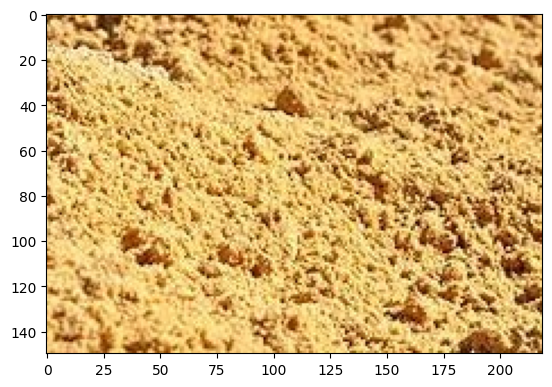

In [16]:
img = mpimg.imread(r'Soil_types\Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
path,dir,files = next(os.walk("Soil_types"))
print(files[0])

Black.png


In [18]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for i in range(len(files)):
    if files[i][0:5] == 'Black':
        black.append(files[i])
    elif files[i][0:6] == 'Cinder':
        cinder.append(files[i])
    elif files[i][0:8] == 'Laterite':
        laterite.append(files[i])
    elif files[i][0:4] == 'Peat':
        peat.append(files[i])
    elif files[i][0:6] == 'Yellow':
        yellow.append(files[i])
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

75 60 60 60 58


In [19]:
# os.mkdir('images_resized')
original_path = 'Soil_types'
new_path = 'compressed_images/'

os.mkdir(new_path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'compressed_images/'

In [20]:
from PIL import Image
import os, sys

def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):
  src_path = srcdir+srcfile

  targetfile = os.path.splitext(srcfile)
  extension = os.path.splitext(srcfile)[1]
     
  if srcfile != targetfile:
     try :
         im = Image.open(src_path)
         im = im.rotate(90)
         im = im.resize(size) 
         im.save(targetdir+targetfile[0]+'__'+".jpg")
     except IOError as io:
         print ("cannot change image for ", srcfile)

if __name__=="__main__":
  targetdir = "compressed_images1/"
  srcdir = "compressed_images/"

  for file in os.listdir(srcdir):
     resize_rename_rotate(srcdir,file,targetdir)

In [21]:
for i in range(len(files)):
    filename = os.listdir(path)[i]
    f_img = path+"/"+filename
    img = Image.open(f_img)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    new_img_path = new_path+'/'+filename
    img.save(new_img_path)

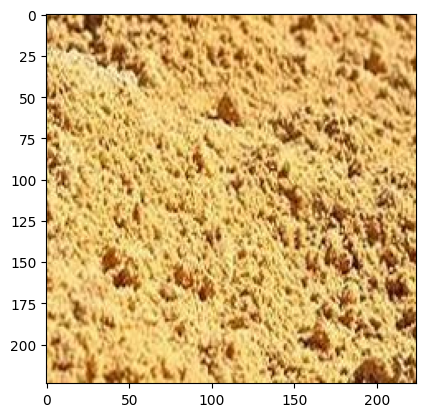

In [22]:
img = mpimg.imread(r'compressed_images\Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

In [23]:
image_directory = 'compressed_images/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [24]:
soil_images.shape

(313, 224, 224, 3)

In [25]:
filenames = os.listdir('compressed_images/')

In [26]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:5] == 'Black':
        labels.append(0)
    elif files[0:6] == 'Cinder':
        labels.append(1)
    elif files[0:8] == 'Laterite':
        labels.append(2)
    elif files[0:4] == 'Peat':
        labels.append(3)
    elif files[0:6] == 'Yellow':
        labels.append(4)
print(len(labels))

313


In [27]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(75, 60, 60, 60, 58)

In [28]:
X = soil_images
Y = np.asarray(labels)

In [29]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [31]:
Y_train.shape,Y_test.shape

((250,), (63,))

In [32]:
X_train_scaled = X_train/255

In [33]:
X_test_scaled = X_test/255

In [35]:
import tensorflow_hub as hub

In [36]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [37]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [38]:
number_of_classes = 5

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(5,activation='softmax'))
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4,227,141
Trainable params: 1,969,157
Non-

In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.25,batch_size=16)

Epoch 1/20


c:\Users\salman\OneDrive\Desktop\Bytecamp-hackethon\env\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 13s 667ms/step - loss: 1.4213 - acc: 0.4545 - val_loss: 0.8687 - val_acc: 0.6349
Epoch 2/20
12/12 [==============================] - 6s 531ms/step - loss: 0.5066 - acc: 0.8449 - val_loss: 1.0377 - val_acc: 0.6349
Epoch 3/20
12/12 [==============================] - 6s 490ms/step - loss: 0.2541 - acc: 0.8930 - val_loss: 0.9862 - val_acc: 0.6667
Epoch 4/20
12/12 [==============================] - 5s 452ms/step - loss: 0.2439 - acc: 0.9198 - val_loss: 0.6191 - val_acc: 0.8095
Epoch 5/20
12/12 [==============================] - 5s 450ms/step - loss: 0.0822 - acc: 0.9679 - val_loss: 0.7205 - val_acc: 0.8095
Epoch 6/20
12/12 [==============================] - 6s 475ms/step - loss: 0.0521 - acc: 0.9840 - val_loss: 0.7950 - val_acc: 0.7778
Epoch 7/20
12/12 [==============================] - 5s 443ms/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5733 - val_acc: 0.8730
Epoch 8/20
12/12 [==============================] - 6s 542ms/step - loss: 0.0030 - acc

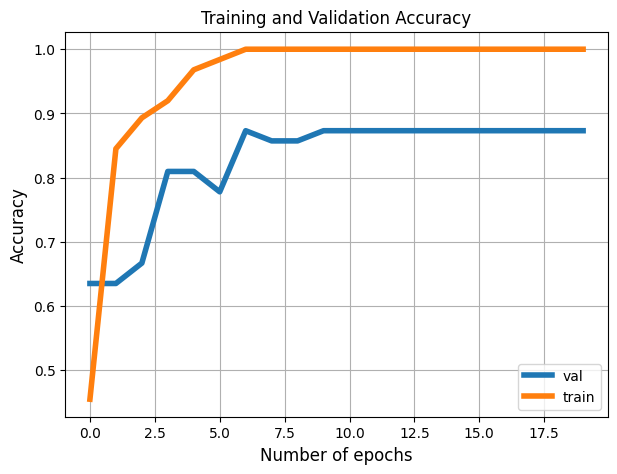

In [41]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

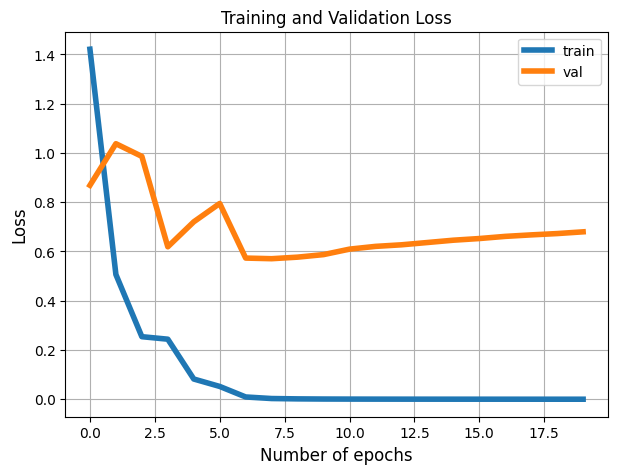

In [42]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [43]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

2/2 [==============================] - 2s 844ms/step - loss: 0.7111 - acc: 0.8254
Test Loss =  0.7111461162567139
Test Acc =  0.8253968358039856


1/1 [==============================] - 1s 1s/step
4
Yellow Soil


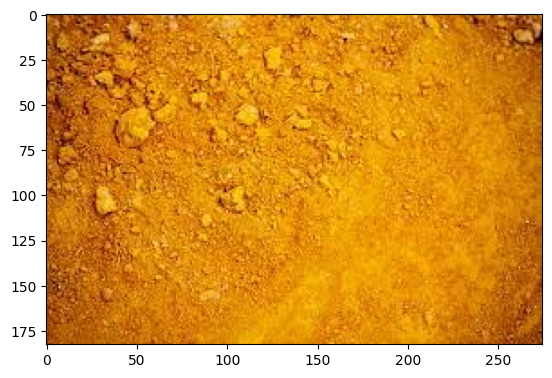

In [48]:
img_test = cv2.imread('./yellow.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread('./yellow.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [50]:
model.save('my_model.h5')

In [52]:
from tensorflow.keras.models import load_model

In [54]:
load_models = load_model('my_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})